In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

import os
if not "milligrad" in os.listdir():
    os.chdir('..')

from milligrad import Tensor, Module, GD, topological_sort

from matplotlib import pyplot as plt

In [2]:
class MLP(Module):
    def __init__(self):
        self.w1 = Tensor.xavier(3, 20)
        self.w2 = Tensor.xavier(20, 2)
        self.b1 = Tensor.randn(20)
        self.b2 = Tensor.randn(2)
        
    def __call__(self, x):
        x = (x @ self.w1 + self.b1).relu()
        return (x @ self.w2 + self.b2).tanh()
    
    def parameters(self) -> list[Tensor]:
        return [self.w1, self.w2, self.b1, self.b2]

In [3]:


b = Tensor.randn(3, name="bias")
w = Tensor.randn(2, 3, name="weight")
x = Tensor.randn(5, 2, name="input")
y = (x @ w + b).relu()

# operations are recorded to perform backpropagation
# the order below is the order in which we bacpropagate
sorted_tensors = reversed(topological_sort(y))
[x.name for x in sorted_tensors if x.name] # "" is falsy

['relu', '+', '@', 'input', 'weight', 'bias']

In [ ]:
from milligrad import Adam

x = Tensor.randn(20, 3)
y = Tensor.ones(20, 2)

model = MLP()
optim = Adam(model.parameters(), lr=1e-3)

losses = []
for i in range(1000):
    y_hat = model(x)
    loss = ((y - y_hat)**2).sum().sum()
    
    optim.zero_grad()
    loss.backward()
    optim.step()
        
    losses.append(loss.data)

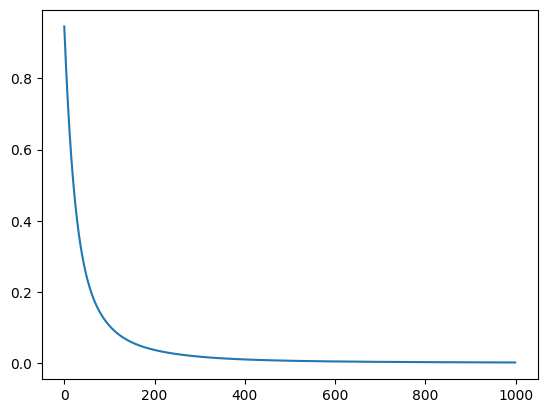

In [ ]:
plt.plot(losses)

In [ ]:
y_hat

array([[0.99510088, 0.99516665],
       [0.9986983 , 0.99835706],
       [0.99846159, 0.99423783],
       [0.99776659, 0.99260626],
       [0.99637238, 0.99346186],
       [0.98807631, 0.98123985],
       [0.99247664, 0.9901607 ],
       [0.99248308, 0.99597128],
       [0.99958865, 0.9981115 ],
       [0.99616041, 0.9942491 ],
       [0.99442878, 0.99388627],
       [0.9980566 , 0.99809284],
       [0.99441371, 0.99706009],
       [0.99661998, 0.99172219],
       [0.99032187, 0.99371566],
       [0.99151744, 0.98801355],
       [0.9953634 , 0.99320882],
       [0.9963637 , 0.99731971],
       [0.99938869, 0.99700708],
       [0.99635127, 0.99534437]])

In [ ]:
# example of using no_grad
with Tensor.no_grad():
    y_hat = model(x)
    y_hat.backward()

AssertionError: No gradient tracking when in no_grad mode